# Lección 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Population.csv")

# sns.lineplot(x=population.index, y=population['1960'])

Mexico = population.loc[population["Country Name"]=="Mexico", "2014":"2019"]
Mexico = Mexico.T

Mexico

,152
2014,120355128.0
2015,121858258.0
2016,123333376.0
2017,124777324.0
2018,126190788.0
2019,127575529.0


## Pruebate

<Axes: title={'center': 'Fertility rate 2018'}, xlabel='Country Name'>

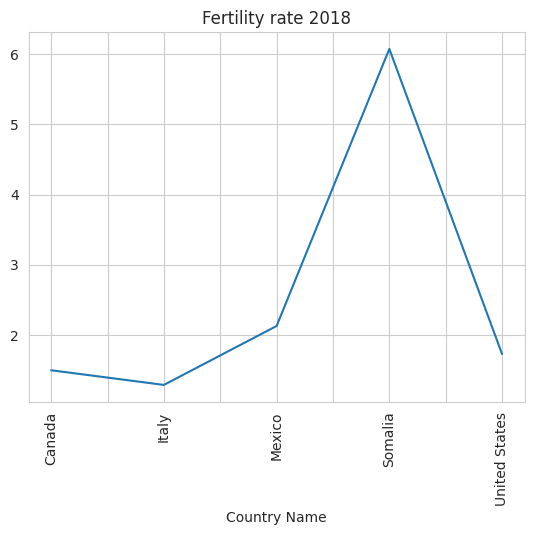

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fertilidad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Fertility.csv")

# Se selecciona solo México
fertilidad_mex = fertilidad.loc[fertilidad["Country Code"]=="MEX"]
fertilidad_mex = fertilidad_mex.set_index("Country Name")

# Se elimina COuntry code
del fertilidad_mex["Country Code"]

#Se intercambian columnas por filas
fertilidad_mex= fertilidad_mex.T;

#Se grafica
# fertilidad_mex.plot(title = "Fertility rate in Mexico", linestyle="--", legend = False)

#Canada y Méico
fertilidad_canmex = fertilidad.loc[(fertilidad["Country Code"]=="MEX")|(fertilidad["Country Code"]=="CAN")]
fertilidad_canmex = fertilidad_canmex.set_index("Country Name")
del fertilidad_canmex["Country Code"]
fertilidad_canmex = fertilidad_canmex.T

# fertilidad_canmex.plot(title = "Fertility rate", linestyle="--")

fertilidad5 = fertilidad.loc[(fertilidad["Country Code"]=="MEX")|(fertilidad["Country Code"]=="CAN")|(fertilidad["Country Code"]=="USA")|
 (fertilidad["Country Code"]=="SOM")|(fertilidad["Country Name"]=="Italy"),["Country Name", "2018"]].set_index("Country Name")

fertilidad5.plot(legend = False, rot = 90, title = "Fertility rate 2018")


# Lección 3

## Pruebate

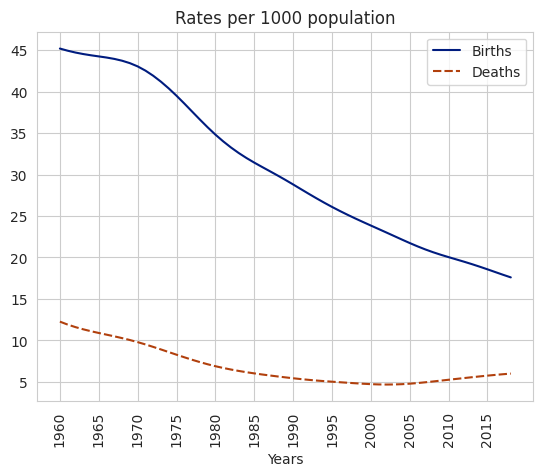

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

#Ordena los DF en algo más leíble
def preparar(df_base,columna, pais="Mexico"):
  df = df_base.loc[df_base["Country Name"]==pais];
  df = df.drop("Country Code", axis=1)
  df.set_index("Country Name", inplace = True)
  df = df.T
  df.columns = [columna]
  df.index.name = "Years"
  return df

death = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Death.csv")
birth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Birth.csv")

#Mandar a llamar la función de preparación
mexico_death = preparar(death,"Deaths")
mexico_birth = preparar(birth, "Births")

#Junta ambos DF
mexico = pd.merge(mexico_birth, mexico_death, on="Years")

sns.lineplot(data=mexico, palette="dark")
plt.xticks(np.arange(0,len(mexico+1),5), rotation = 90);
plt.title("Rates per 1000 population");


Ordena el dataframe inicial death para determinar los tres países con la tasa de mortalidad más alta en el 2018. Obtén una muestra (sample), donde incluyas dichos países, México y otro país de tu selección. Visualiza las tasas en un gráfico de barras horizontales usando Pandas,
como se muestra en la figura:

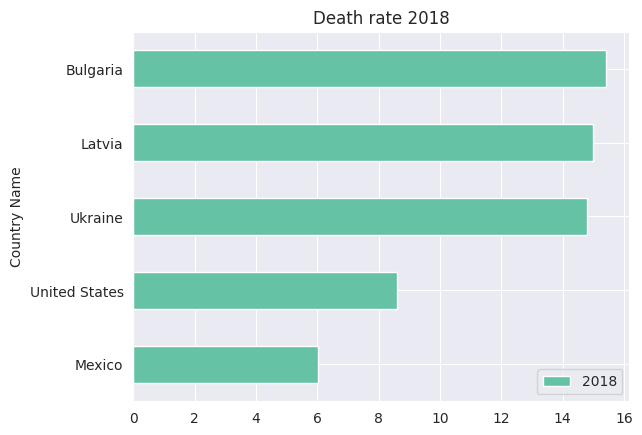

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")
sns.set_palette("Set2")

death = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Death.csv")
birth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Birth.csv")

death_sorted = death.sort_values(by=["2018"]).loc[death["2018"].notna()].reset_index()

#Ambas maneras funcionan, la primera opción si necesita que se resetee el index, la otra no
# sample = death_sorted.loc[len(death_sorted)-3:len(death_sorted), ["Country Name", "2018"]]
sample = death_sorted.iloc[-1:-4:-1][["Country Name", "2018"]]

#Se recuperan los valores de USa y Mex
mexico_USA = death.loc[death["Country Code"].isin(["USA", "MEX"]),["Country Name", "2018"]]

#Se juntan ambos DF y se ordenan de mayor a menor
sample = pd.concat([sample,mexico_USA]).set_index("Country Name").sort_values(by=["2018"])

#Se grafican
sample.plot.barh(title = "Death rate 2018");


In [ ]:
sns.set_palette('Set2')
sns.set_style('darkgrid')
death.sort_values('2018',inplace=True)
death.dropna(axis=0,subset=['2018'],inplace=True)
sample = pd.concat([death[death['Country Name']=='Mexico'],death[death['Country Name']=='United States'],death[-3:]])
sample.plot(kind='barh',x='Country Name',y='2018',title='Death rate 2018')

Utiliza la dataframe inicial birth para realizar un análisis de la tasa de natalidad en el 2018. Se busca determinar cuántos países están por debajo del promedio de nacimientos y cuántos por encima. No olvides borrar los registros que no tienen información registrada (NaN) antes de
hacer los conteos. Visualiza los resultados en un gráfico circular usando Matplotlib, como se muestra en la figura:

### Opción 1

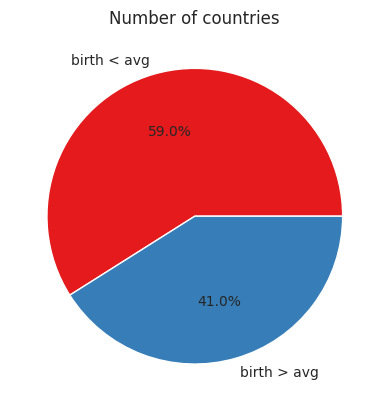

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")
sns.set_palette("Set1")

death = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Death.csv")
birth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Birth.csv")

birth_notna = birth.loc[birth["2018"].notna(), ["Country Name", "2018"]]

birth_notna["Average"] = birth_notna["2018"]>birth_notna["2018"].mean()

#Se actualizan los valores True por birth > avg
# birth_notna["Average"] = birth_notna['Average'].where(birth_notna['Average']==False, "birth > avg")
birth_notna.loc[birth_notna['Average']==True, ["Average"]]="birth > avg"

#Se actualizan los valores False por birth < avg
# birth_notna["Average"] = birth_notna['Average'].where(birth_notna['Average']=="birth > avg", "birth < avg")
birth_notna.loc[birth_notna['Average']==False, ["Average"]]="birth < avg"

birth_notna["Average"].value_counts().plot.pie(ylabel="",autopct="%1.1f%%",title = "Number of countries");

### Opción 2

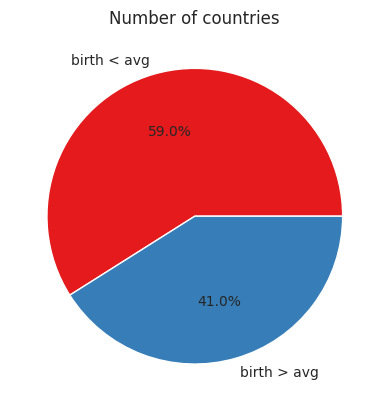

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")
sns.set_palette("Set1")

death = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Death.csv")
birth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Birth.csv")

birth_notna = birth.loc[birth["2018"].notna(), ["Country Name", "2018"]]

birth_notna["Average"] = True

for i in birth_notna.index:
  if birth_notna["2018"].loc[i]>birth_notna["2018"].mean():
    birth_notna.loc[i,["Average"]] = "birth > avg"
  else:
    birth_notna.loc[i,["Average"]] = "birth < avg"

birth_notna["Average"].value_counts().plot.pie(ylabel="",autopct="%1.1f%%",title = "Number of countries");

### Opción del Tec

Text(0.5, 1.0, 'Number of countries')

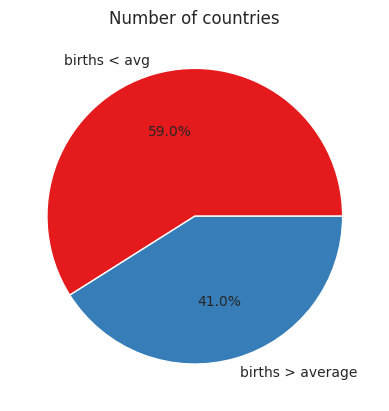

In [ ]:
sns.set_palette("Set1")
birth.dropna(axis=0,subset=['2018'],inplace=True)
below_avg = len(birth[birth['2018'] < birth['2018'].mean()])
count = [below_avg, len(birth['2018']) - below_avg]
plt.pie(count,labels=['births < avg','births > average'],autopct='%1.1f%%')
plt.title('Number of countries')

# Lección 4

## Pruebate

### Lee en dos dataframes: adolescent_fertility y mortality, el contenido de los archivos AdolescentFertility.csv y Mortality.csv, respectivamente (ubicados en el apartado “Archivos adjuntos” de la plataforma), que almacenan por país las tasas de fecundidad adolescente (número de nacimientos por cada 1.000 mujeres de 15 a 19 años) y mortalidad de menores de 5 años (probabilidad por cada 1.000 de que un bebé recién nacido muera antes de cumplir los cinco años) desde 1960.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adolescentes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/AdolescentFertility.csv")
mortalidad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Mortality.csv")

### A partir de los dataframes anteriores, obtén uno donde únicamente almacenes la información de México. Haz los cambios necesarios para que quede con la siguiente estructura:

In [ ]:
adolescentes_mex = adolescentes.loc[adolescentes["Country Name"]=="Mexico"]
mortalidad_mex = mortalidad.loc[mortalidad["Country Code"]=="MEX"]

datos_mex = pd.concat([adolescentes_mex,mortalidad_mex])
datos_mex.index = ["Adolescent Fertility", "Mortality"]
datos_mex.drop(["Country Name", "Country Code"], axis=1, inplace = True)

datos_mex = datos_mex.T

datos_mex.columns.name = "Year"

datos_mex

Year,Adolescent Fertility,Mortality
1960,116.4508,155.8
1961,116.6804,149.3
1962,116.9100,143.3
1963,116.9100,137.9
1964,116.9100,132.7
1965,116.9100,127.9
1966,116.9100,123.4
1967,116.9100,119.1
1968,116.0652,114.8
1969,115.2204,110.7


### 3. Grafica el dataframe anterior, utilizando la plataforma Pandas, para conocer la evolución de estos índices a través de los años. Personaliza las propiedades del gráfico para que se vea como en la siguiente imagen:


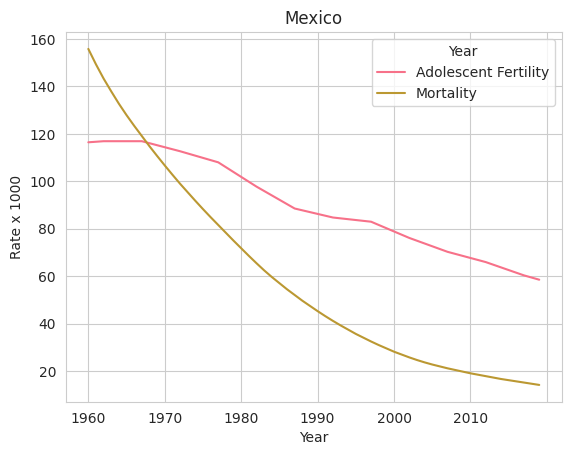

In [ ]:
sns.set_palette("husl")
sns.set_style("whitegrid")
datos_mex.plot(title = "Mexico", ylabel="Rate x 1000", xlabel = "Year");n

### Usando nuevamente los dataframes adolescent_fertility y mortality, obtén la información de ambos índices para los países de Norteamérica, en el 2019. Haz los cambios necesarios para que quede con la siguiente estructura:

In [ ]:
norteamerica_fert = adolescentes.loc[adolescentes["Country Code"].isin(["CAN", "MEX", "USA"]), ["Country Code", "2019"]].set_index("Country Code")
norteamerica_mort = mortalidad.loc[mortalidad["Country Code"].isin(["CAN", "MEX", "USA"]), ["Country Code", "2019"]].set_index("Country Code")

norteamerica = norteamerica_fert.merge(norteamerica_mort, on="Country Code" ,suffixes=["_fertility","_mortality"])
norteamerica.columns = ["Adolescent fertility", "Mortality"]

norteamerica

,Adolescent fertility,Mortality
Country Code,,
CAN,7.6822,4.9
MEX,58.5434,14.2
USA,17.2524,6.5


### 5. Visualiza el dataframe anterior en un gráfico de barras, ocupando la plataforma Pandas. Personaliza sus propiedades para que se vea de la siguiente manera:

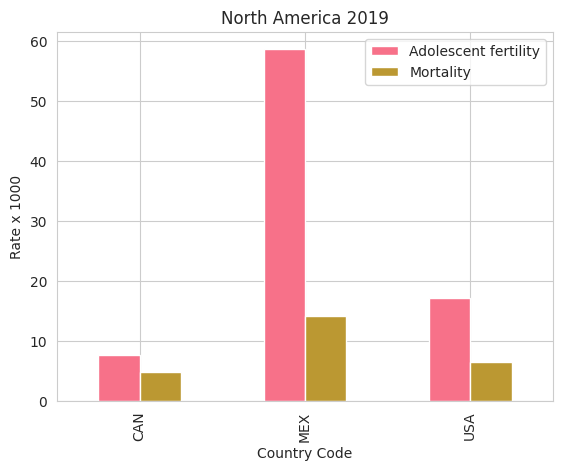

In [ ]:
sns.set_palette("husl")
sns.set_style("whitegrid")

norteamerica.plot(kind= "bar", title = "North America 2019", ylabel = "Rate x 1000");

### Para observar la distribución de ambos indicadores en el mundo, para el 2019, construye un gráfico de histogramas independientes utilizando Matplotlib. Utiliza 5 bins y transparencia de 0.5.

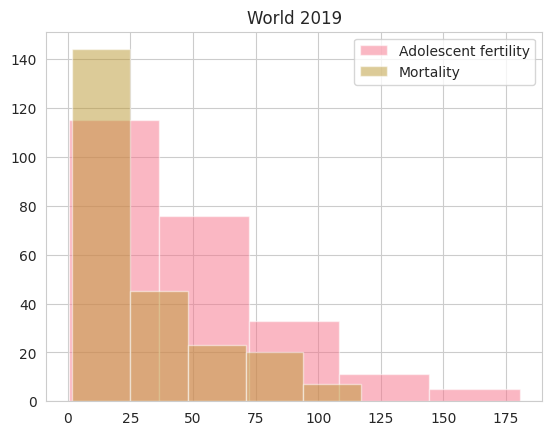

In [ ]:
plt.hist("2019", data=adolescentes, label="Adolescent fertility", bins = 5, alpha=0.5);
plt.hist("2019", data=mortalidad, label="Mortality", bins=5, alpha=.5);
plt.title("World 2019");
plt.legend();


### 7. ¿Cómo han cambiado estos índices en la última década? Compáralos con boxplots en los años 2009 y 2019.

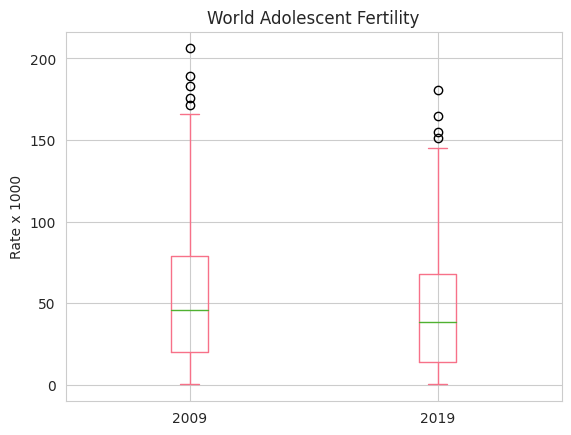

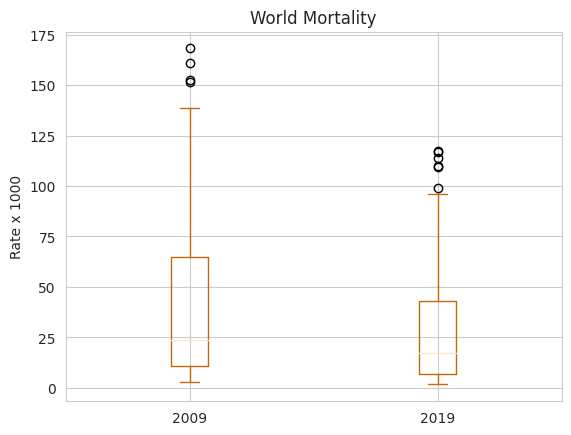

In [ ]:
sns.set_palette("husl")
sns.set_style("whitegrid")

adolescentes[["2009","2019"]].plot.box(title = "World Adolescent Fertility", ylabel = "Rate x 1000");

sns.set_palette("PuOr")
mortalidad[["2009","2019"]].plot.box(title="World Mortality", ylabel="Rate x 1000");

### 8.Emplea la plataforma Seaborn para graficar la relación entre las dos tasas en el 2019. También obtén el índice de correlación numérico para cuantificar la dependencia entre ambas variables.

0.7860446246960763

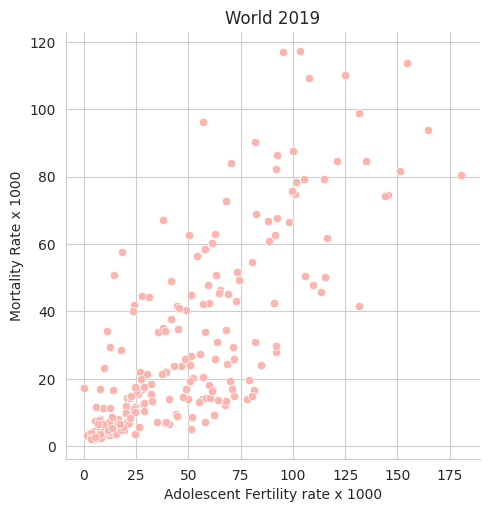

In [ ]:
sns.set_palette("Pastel1")
sns.relplot(kind="scatter", x=adolescentes["2019"], y=mortalidad["2019"]);
plt.title("World 2019");
plt.ylabel("Mortality Rate x 1000");
plt.xlabel("Adolescent Fertility rate x 1000");

corr = adolescentes["2019"].corr(mortalidad["2019"]);
corr

# Lección 5

## Pruébate

### 2. A partir de los dataframes anteriores, obtén uno (info2019) en donde únicamente almacenes la información de ambos indicadores en el año 2019. Haz los cambios necesarios para que quede con la siguiente estructura:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Lee los csv's
gdp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/GDP.csv")
desempleo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Unemployment.csv")

#crear dataframe de 2019
gdp_19 = gdp.loc[:,["Country Code","2019"]]
gdp_19.columns = ["Country Code", "GDP"]
desempleo_19 = desempleo.loc[:,["Country Code", "2019"]]
desempleo_19.columns = ["Country Code", "Unemployment"]

#Se concatenan
info2019 = gdp_19.merge(desempleo_19, on="Country Code")

info2019

,Country Code,GDP,Unemployment
0,ABW,NaN,NaN
1,AFG,8246.351581,10.980000
2,AGO,17339.271710,6.930000
3,ALB,31009.390130,11.470000
4,AND,NaN,NaN
...,...,...,...
259,XKX,NaN,NaN
260,YEM,NaN,12.900000
261,ZAF,43799.052020,28.469999
262,ZMB,9522.766264,11.910000


### 3. Grafica el dataframe anterior, utilizando la plataforma Matplotlib, para visualizar la distribución de estos índices a través de histogramas en ejes duales. Personaliza las propiedades del gráfico para que se vea de la siguiente manera:

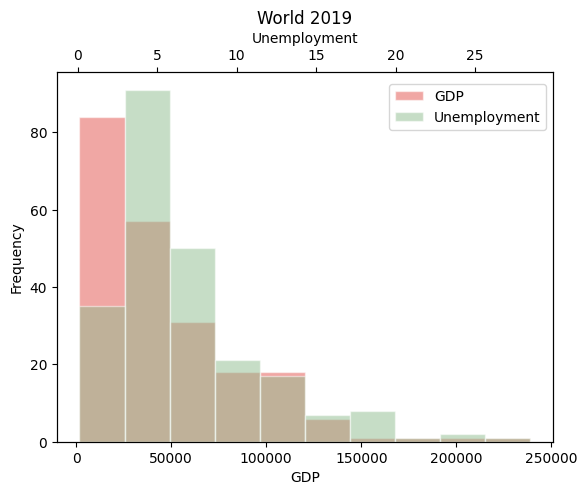

In [ ]:
sns.set_palette("Spectral")

fig,fig1 = plt.subplots()

fig1.hist("GDP", data=info2019, label="GDP", alpha=0.5, edgecolor="white");
fig1.set_title("World 2019")
fig1.set_xlabel("GDP")
fig1.set_ylabel("Frequency")

fig2 = fig1.twiny()
fig2.hist("Unemployment", data = info2019, label="Unemployment", color = "darkseagreen", alpha=0.5, edgecolor="white")
fig2.set_xlabel("Unemployment")

fig.legend(bbox_to_anchor=(0.9,0.87));


### 4. Almacena en un dataframe (continents), el contenido del archivo Continents.csv (ubicado en el apartado “Archivos adjuntos” de la plataforma), que indica a qué continente y región pertenece cada país, y combínalo con el dataframe info2019, usando la columna Country Code, para obtener el dataframe continents_2019.

In [ ]:
continents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Continents.csv")

continents_2019 = info2019.merge(continents, on="Country Code")

continents_2019

,Country Code,GDP,Unemployment,Name,Continent,Region
0,ABW,NaN,NaN,Aruba,Americas,Latin America and the Caribbean
1,AFG,8246.351581,10.980000,Afghanistan,Asia,Southern Asia
2,AGO,17339.271710,6.930000,Angola,Africa,Sub-Saharan Africa
3,ALB,31009.390130,11.470000,Albania,Europe,Southern Europe
4,AND,NaN,NaN,Andorra,Europe,Southern Europe
...,...,...,...,...,...,...
210,WSM,26153.906140,8.220000,Samoa,Oceania,Polynesia
211,YEM,NaN,12.900000,Yemen,Asia,Western Asia
212,ZAF,43799.052020,28.469999,South Africa,Africa,Sub-Saharan Africa
213,ZMB,9522.766264,11.910000,Zambia,Africa,Sub-Saharan Africa


### 5. Del dataframe anterior, obtén los promedios por continente de ambos índices. Almacena el resultado en continents_group.

In [ ]:
continents_group = continents_2019[["GDP", "Unemployment"]].groupby(continents_2019["Continent"]).mean()

continents_group

,GDP,Unemployment
Continent,,
Africa,16870.222166,8.358113
Americas,41861.482377,7.554849
Asia,52018.493888,5.709600
Europe,85926.422765,6.761282
Oceania,36056.567613,5.731818


### 6. Crea una matriz en la que vayas añadiendo las siguientes subgráficas: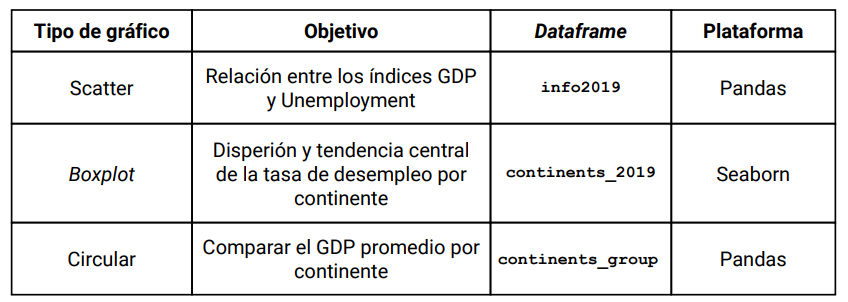

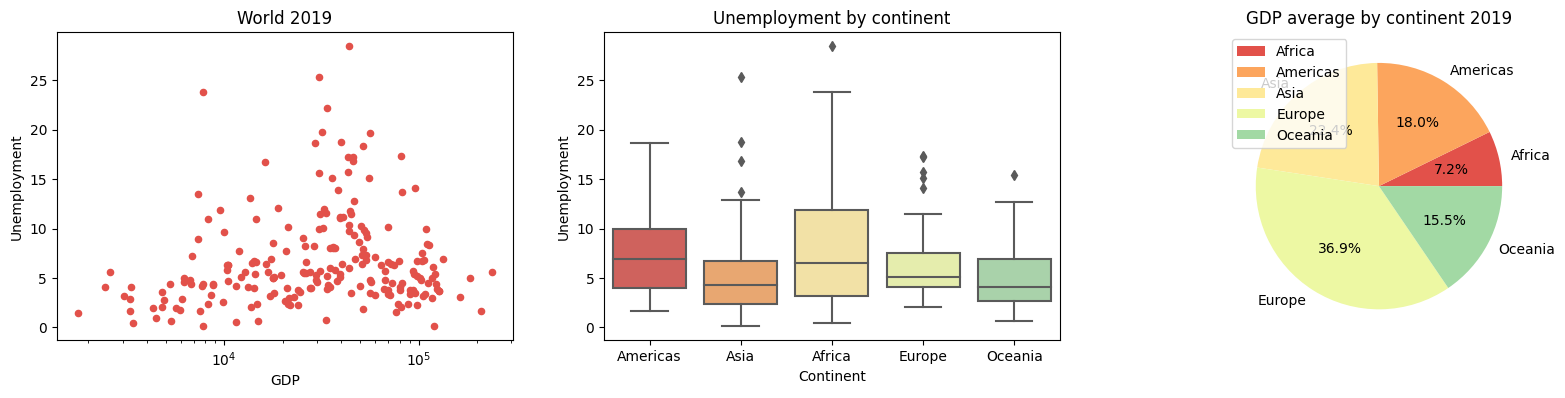

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,4));
# plt.subplots_adjust(wspace=1)

ax1 = axs[0]
info2019.plot.scatter("GDP","Unemployment", ax=ax1);
ax1.set_xscale("log");
ax1.set_title("World 2019");

ax2 = axs[1]
sns.boxplot(x="Continent",y="Unemployment", data=continents_2019, ax=ax2);
ax2.set_title("Unemployment by continent");

ax3= axs[2]
continents_group.plot.pie(y="GDP", labels = continents_group.index,  ax = ax3, autopct="%1.1f%%")
ax3.set_title("GDP average by continent 2019")
ax3.set_ylabel("");
ax3.legend(loc = "upper left");

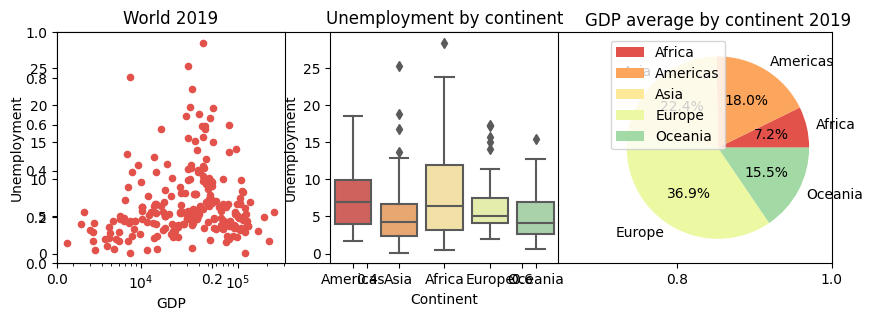

In [ ]:
fig, axs = plt.subplots(figsize=(10,3));
# plt.subplots_adjust(wspace=1)

ax1 = fig.add_subplot(131);
info2019.plot.scatter("GDP","Unemployment", ax=ax1);
ax1.set_xscale("log");
ax1.set_title("World 2019");

ax2 = fig.add_subplot(132);
sns.boxplot(x="Continent",y="Unemployment", data=continents_2019, ax=ax2);
ax2.set_title("Unemployment by continent");

ax3=fig.add_subplot(133)
continents_group.plot.pie(y="GDP", labels = continents_group.index,  ax = ax3, autopct="%1.1f%%")
ax3.set_title("GDP average by continent 2019")
ax3.set_ylabel("");
ax3.legend(loc = "upper left");

### 7. Almacena la información de México en un dataframe con la estructura mostrada y grafica ambos índices para visualizar la evolución a través de los años, utilizando ejes duales y Seaborn.

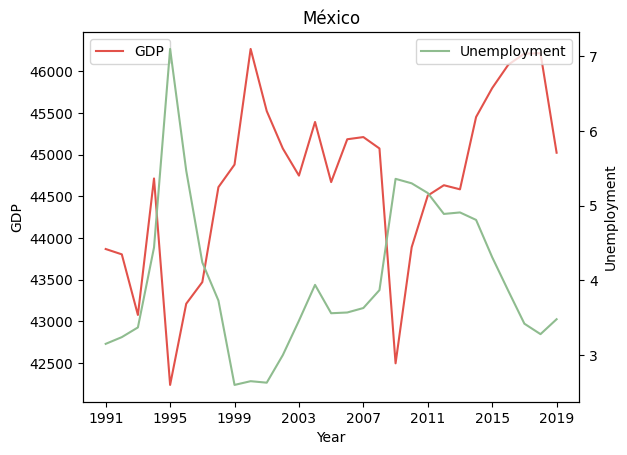

In [ ]:
import numpy as np

#Creación de gdp mex
gdp_mex = gdp.loc[gdp["Country Code"]=="MEX", "1991":"2019"]
gdp_mex.index =["GDP"]

#Creación de unemployment mex
desempleo_mex = desempleo.loc[desempleo["Country Code"]=="MEX", "1991":"2019"]
desempleo_mex.index =["Unemployment"]

#Se ordena la info y se conjunta
mex_info = pd.concat([gdp_mex,desempleo_mex])
mex_info = mex_info.T
mex_info.index.name = "Year"

fig, ax1 = plt.subplots();

sns.lineplot(x="Year", y="GDP", data=mex_info, ax=ax1, label="GDP")
ax1.set_xticks(np.arange(0,len(mex_info.index)+1,4));
# ax1.set_xticks(["1991","1995","1999","2003","2007","2011","2015","2019"]);

ax2 = ax1.twinx();
sns.lineplot(x="Year", y="Unemployment", data=mex_info, ax=ax2, label="Unemployment", color="darkseagreen")

plt.title("México");

# Lección 6: Anotaciones en las Gráficas

## Pruébate

### 1. Lee en un dataframe woman_parl, el contenido del archivo WomanParliaments.csv (ubicado en el apartado “Archivos adjuntos” de la plataforma) que almacena, por país, el porcentaje de escaños parlamentarios ocupados por mujeres desde 1997.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

woman_parl = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/WomanParliaments.csv")
metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Metadata.csv")

woman_parl

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
2,Angola,AGO,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.000000,...,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000
3,Albania,ALB,NaN,NaN,5.161290,5.161290,5.714286,5.714286,5.714286,6.428571,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
4,Andorra,AND,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,14.285714,14.285714,...,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571,46.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,0.664452,0.664452,0.664452,0.668896,0.668896,0.332226,0.332226,...,0.332226,0.332226,0.332226,0.332226,0.000000,0.000000,0.000000,0.000000,0.332226,0.332226
261,South Africa,ZAF,25.000000,28.750000,30.000000,29.824561,29.824561,29.824561,29.824561,32.778702,...,42.250000,42.250000,42.250000,41.500000,42.000000,42.000000,41.836735,42.748092,46.347607,46.750000
262,Zambia,ZMB,9.677419,10.256410,10.126582,10.126582,10.126582,12.025316,12.025316,12.025316,...,11.464968,11.464968,11.464968,10.759494,12.658228,17.964072,17.964072,17.964072,17.964072,16.766467


### 2. A partir del dataframe anterior obtén uno (mexico) donde únicamente almacenes la información de Mexico. Haz los cambios necesarios para que quede con la siguiente estructura:


In [2]:
mex_parl = woman_parl.loc[woman_parl["Country Code"]=="MEX", "Country Name":]
mex_parl.drop("Country Code", axis=1, inplace = True)
mex_parl = mex_parl.set_index("Country Name").T
mex_parl.columns= ["México"]
mex_parl["México"] = mex_parl["México"].round(1)
mex_parl


,México
1997,14.2
1998,17.4
1999,18.2
2000,16.0
2001,16.0
2002,16.0
2003,22.6
2004,22.6
2005,24.2
2006,22.6


### 3. Obtén otro dataframe (mex_world) con el promedio anual de todos los países y concaténalo con el de México para obtener el siguiente resultado:

In [8]:
woman_parl_años = woman_parl.set_index("Country Name").drop("Country Code", axis=1)
avg_global = pd.DataFrame(woman_parl_años.mean())

avg_global.columns = ["World"]
avg_global["World"] = avg_global["World"].round(2)

mex_world = pd.merge(mex_parl.reset_index(),avg_global.reset_index(), on="index").set_index("index")
mex_world.index.name = ""

mex_world

,México,World
,,
1997,14.2,10.24
1998,17.4,10.93
1999,18.2,11.39
2000,16.0,11.82
2001,16.0,12.19
2002,16.0,13.55
2003,22.6,13.83
2004,22.6,14.41
2005,24.2,15.28


### 4. Grafica el dataframe anterior, utilizando la plataforma Pandas, e incluye una tabla con los índices de ambas series. Personaliza las propiedades del gráfico para que se vea como en la siguiente imagen:

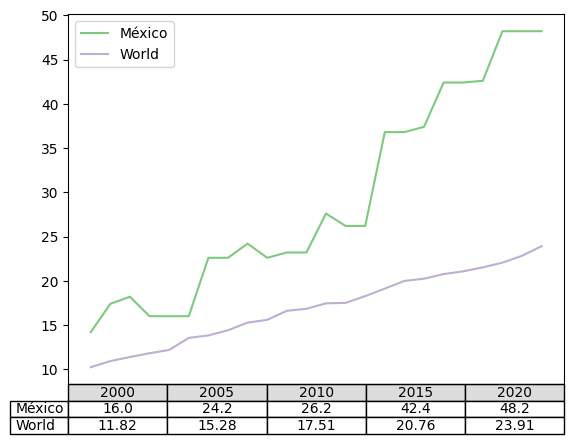

In [98]:
sns.set_palette("Accent")

mex_world_T=mex_world.loc["2000":"2020":5].T

mex_world.plot(xticks=[])
t = plt.table(cellText=mex_world_T.values, colLabels = mex_world_T.columns, cellLoc="center", rowLabels=mex_world_T.index,
              colColours=["gainsboro"]*len(mex_world_T.columns))
t.auto_set_font_size(False)
t.set_fontsize(10)


### 5. Almacena en un dataframe (metadata), el contenido del archivo Metadata.csv (ubicado en el apartado “Archivos adjuntos” de la plataforma), el cual indica a qué región pertenece cada país, y combínalo con el dataframe woman_parl, usando la columna Country Code. Obtén los promedios por región del año 2020. Almacena el resultado en el dataframe info_region:

In [50]:
metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Metadata.csv")

woman_parl_meta = pd.merge(woman_parl, metadata, on="Country Code")

info_region = woman_parl_meta.groupby("Region").mean(numeric_only = True)[["2020"]]

info_region

,2020
Region,
East Asia & Pacific,16.531978
Europe & Central Asia,29.814495
Latin America & Caribbean,28.145326
Middle East & North Africa,17.234940
North America,28.229436
South Asia,17.509109
Sub-Saharan Africa,22.672044


### 6. Crea un gráfico de barras del dataframe anterior con Seaborn. Incluye los valores del promedio obtenidos, como se muestra en la figura:

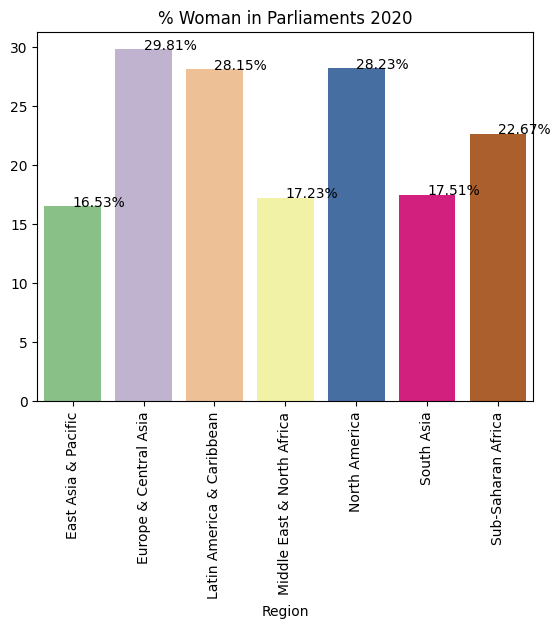

In [51]:
info_region["2020"]=info_region["2020"].round(2)

sns.barplot(x=info_region.index, y="2020", data=info_region)
plt.xticks(rotation = 90);
plt.title("% Woman in Parliaments 2020");
plt.ylabel("");

#Inserción de texto
for i in range(info_region.shape[0]):
  plt.text(i, info_region.iloc[i,0], str(info_region.iloc[i,0])+"%")

7. Grafica con Matplotlib la información de woman_parl 2020 en un boxplot y ubica a México según el valor de su índice.

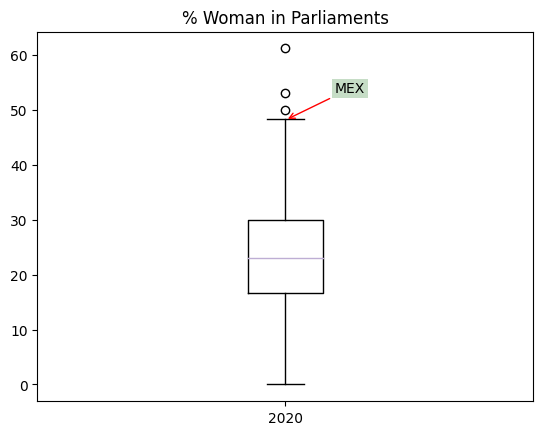

In [101]:
plt.boxplot(woman_parl["2020"].dropna(), labels=["2020"]);
plt.title("% Woman in Parliaments")

plt.annotate("MEX", xy=(1,woman_parl.loc[woman_parl["Country Code"]=="MEX","2020"]), xytext=(1.1,woman_parl.loc[woman_parl["Country Code"]=="MEX","2020"]+5),
             arrowprops=dict(arrowstyle="->",color="red"),bbox=dict(facecolor="darkseagreen",alpha=0.5,pad=2,edgecolor="none"));

# Evaluación

<Axes: ylabel='Count'>

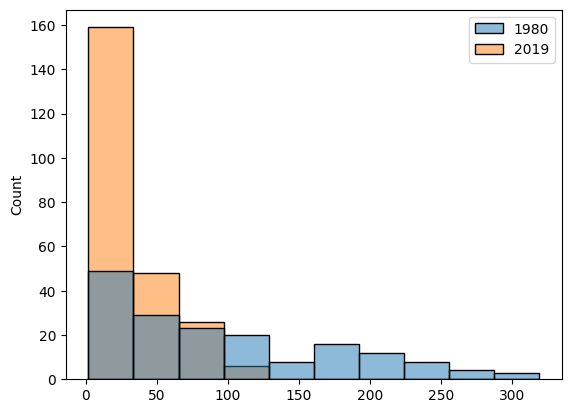

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mortalidad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Mortality.csv")

mortalidad_america = mortalidad.loc[mortalidad["Country Name"].isin(["Mexico","United States", "Canada"]), ["Country Code", "1960","1980","2000","2019"]].set_index("Country Code")

# mortalidad_america.plot(kind="bar")
mortalidad_mex = mortalidad.loc[mortalidad["Country Name"].isin(["Mexico"]), ["Country Code", "1960","1980","2000","2019"]].set_index("Country Code")

sns.histplot(mortalidad[["1980","2019"]], alpha=0.5, bins=10)

# Práctica del Reto

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/AlcoholConsumption.csv")

info

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70
...,...,...,...,...,...,...
208,Vietnam,3.91,722.807559,11.653322,71.000000,27.84
209,West Bank and Gaza,NaN,NaN,NaN,32.000000,71.90
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000,30.64
211,Zambia,3.56,432.226337,12.019036,61.000000,35.42


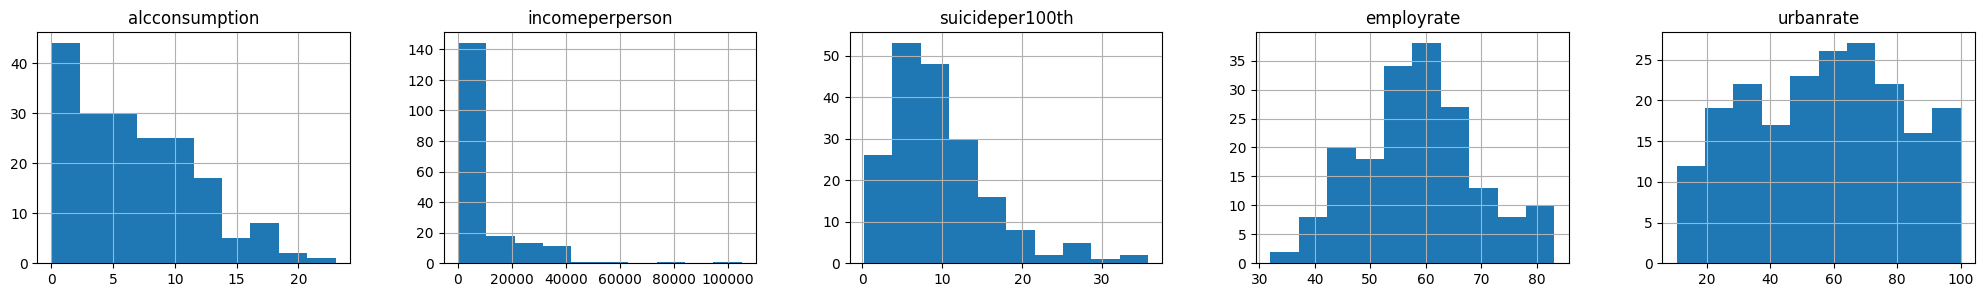

In [37]:
axs = info.hist(layout=(1,5), figsize=(25,3))